In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from sklearn import datasets, linear_model

In [2]:
def get_data_by_concat(file_name):
    data = pd.read_csv(file_name)
    
    Y = data['Price']
    feature_1 = data['Square_Feet']
    
    feature_0 = pd.Series(np.ones(len(data)))
    
    X = pd.concat([feature_0, feature_1], axis=1)
    X.columns = ['Init', 'Square_Feet']
    
    return X,Y

In [3]:
def linear_model_main_concat(X, Y, predict_value):
    regr = linear_model.LinearRegression()
    regr.fit(X, Y)
    
    predict_outcome = regr.predict(predict_value)
    predictions = {}
    predictions['intercept'] = regr.intercept_ # 截距
    predictions['coefficient'] = regr.coef_    # 回归系数
    predictions['predicted_value'] = predict_outcome

    plt.plot(X['Square_Feet'], regr.predict(X), color='red', linewidth=1)
    plt.plot(X['Square_Feet'], Y, 'o')
    plt.show()

    return predictions

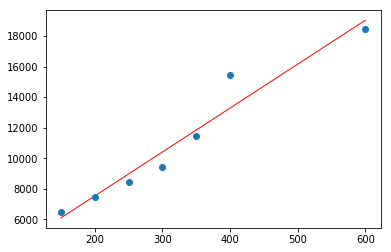

intercept 1771.8085106382914
coefficient [ 0.         28.77659574]
predicted_value [21915.42553191]


In [4]:
X = Y = pd.DataFrame()
X,Y= get_data_by_concat('data_house.csv')
predictvalue = [[1, 700]]
result = linear_model_main_concat(X, Y, predictvalue)
print('intercept', result['intercept'])
print('coefficient', result['coefficient'])
print('predicted_value', result['predicted_value'])

# 结果验证

In [5]:
Y

0     6450
1     7450
2     8450
3     9450
4    11450
5    15450
6    18450
Name: Price, dtype: int64

In [6]:
np.dot(result['coefficient'], X.T) + result['intercept']

array([ 6088.29787234,  7527.12765957,  8965.95744681, 10404.78723404,
       11843.61702128, 13282.44680851, 19037.76595745])

In [7]:
np.dot(result['coefficient'], [[1],[700]]) + result['intercept']

array([21915.42553191])

# 通过 zip 提取数据
##### for Square_Feet, Price in zip(data['Square_Feet'], data['Price'])

In [8]:
def get_data_by_zip(file_name):
    data = pd.read_csv(file_name)
    #print(data, '\n')
    X = []
    Y = []
    
    for Square_Feet, Price in zip(data['Square_Feet'], data['Price']):
        X.append([float(Square_Feet)])
        Y.append([float(Price)])
    
    return X,Y

In [9]:
def linear_model_main_zip(X, Y, predict_value):
    regr = linear_model.LinearRegression()
    regr.fit(X, Y)
    
    predict_outcome = regr.predict(predict_value)
    predictions = {}
    predictions['intercept'] = regr.intercept_
    predictions['coefficient'] = regr.coef_
    predictions['predicted_value'] = predict_outcome

    plt.plot(X, regr.predict(X), color='red', linewidth=1)
    plt.plot(X, Y, 'o')
    plt.show()
    
    return predictions

[[150.0], [200.0], [250.0], [300.0], [350.0], [400.0], [600.0]]
[[6450.0], [7450.0], [8450.0], [9450.0], [11450.0], [15450.0], [18450.0]]


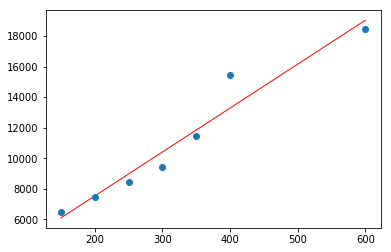

intercept [1771.80851064]
coefficient [[28.77659574]]
predicted_value [[21915.42553191]]


In [10]:
X = Y = pd.DataFrame()
X,Y= get_data_by_zip('data_house.csv')
# print(X, Y, sep='\n\n', end='\n\n')
predictvalue = [[700]]
print(X)
print(Y)
result = linear_model_main_zip(X, Y, predictvalue)
print('intercept', result['intercept'])
print('coefficient', result['coefficient'])
print('predicted_value', result['predicted_value'])